# 환경설정

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 시각화를 위한 폰트설정
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!
# 나눔고딕 설치 (이 코드 사용 시 아래있는 폰트 로드할 경우 colab에서 오류발생 아래의 폰트 설정 꼭 주석처리!)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)
# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터로드

In [3]:
# 코랩에서 구글드라이브 마운트하여 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# 내 드라이브 내의 파일을 불러올 때 경로 /content/drive/My Drive/를 앞에 붙여주기
# encoding='utf-8'이 안될 때는 encoding='CP949' 사용.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/EQK_지진정보_15~21.csv', encoding='CP949')
df.shape

(790, 6)

# 데이터 확인

In [24]:
df.head(1)

,시간,규모,진앙(km),위도,경도,위치
0,2015-01-06 13:06:40,2.8,12,38.43,126.28,북한 황해북도 평산 북서쪽 17km 지역


In [25]:
df.tail(1)

,시간,규모,진앙(km),위도,경도,위치
789,2020-12-23 21:28:20,2.2,12,37.73,126.73,경기 파주시 남서쪽 6km 지역


In [40]:
df.isnull().sum()

시간        0
규모        0
진앙(km)    0
위도        0
경도        0
위치        0
dtype: int64

In [27]:
df.dtypes

시간         object
규모        float64
진앙(km)      int64
위도        float64
경도        float64
위치         object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시간      24 non-null     object 
 1   규모      24 non-null     float64
 2   진앙(km)  24 non-null     int64  
 3   위도      24 non-null     float64
 4   경도      24 non-null     float64
 5   위치      24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ KB


In [13]:
df.columns

Index(['시간', '규모', '진앙(km)', '위도', '경도', '위치'], dtype='object')

In [28]:
# 위도의 평균, 중간, 최소, 최대값
# 위도 데이터 갯수 확인
print(df["위도"].mean())
print(df["위도"].median())
print(df["위도"].min())
print(df["위도"].max())
print(df["위도"].count())

36.2629873417722
36.01
32.96
41.39
790


In [29]:
# 위도를 describe으로 요약
df["위도"].describe()

count    790.000000
mean      36.262987
std        1.530035
min       32.960000
25%       35.760000
50%       36.010000
75%       36.767500
max       41.390000
Name: 위도, dtype: float64

In [30]:
# 2개의 컬럼을 describe으로 요약
# 두 개 이상은 list형식으로 출력해야 함.
df[["위도","경도"]].describe()

,위도,경도
count,790.000000,790.000000
mean,36.262987,128.080747
std,1.530035,1.577613
min,32.960000,124.160000
25%,35.760000,126.872500
50%,36.010000,129.160000
75%,36.767500,129.310000
max,41.390000,130.630000


In [31]:
# describe으로 문자열 데이터 요약
# top은 가장 많이 등장하는 문자열 데이터
# freq은 빈도수를 의미
# 결측치는 제외해서 보여줌
df.describe(include="object")

,시간,위치
count,790,790
unique,790,473
top,2017-02-25 06:58:44,경북 경주시 남남서쪽 9km 지역
freq,1,74


In [34]:
# 중복값 제외 확인
print(df["규모"].nunique())
df["규모"].unique()

28


array([2.8, 3.5, 2.2, 2.1, 2.7, 3.3, 2.9, 2.3, 2. , 2.6, 2.4, 3.7, 2.5,
       3.2, 3.9, 3. , 3.1, 5. , 5.1, 5.8, 3.6, 3.4, 4.5, 5.4, 4.3, 4.6,
       4.1, 3.8])

In [35]:
print(df["위도"].nunique())
df["위도"].unique()

321


array([38.43, 37.51, 36.6 , 33.61, 36.09, 32.96, 37.36, 34.16, 36.43,
       37.18, 35.14, 35.88, 36.76, 33.79, 38.41, 35.85, 36.35, 36.32,
       37.63, 33.24, 36.07, 33.26, 33.22, 35.15, 35.32, 37.19, 37.17,
       37.2 , 36.38, 39.09, 33.27, 34.7 , 35.78, 33.3 , 34.09, 35.74,
       35.8 , 35.67, 35.69, 36.9 , 36.02, 36.01, 38.42, 36.22, 36.95,
       36.21, 33.52, 33.23, 38.73, 35.61, 38.71, 36.31, 37.6 , 35.33,
       39.38, 35.22, 35.92, 33.53, 33.51, 35.57, 35.42, 37.75, 37.11,
       40.68, 36.39, 36.  , 33.05, 34.3 , 35.87, 39.49, 38.74, 35.51,
       35.48, 38.69, 36.8 , 35.12, 33.06, 36.75, 38.35, 38.84, 38.38,
       33.48, 38.65, 35.65, 35.55, 35.77, 35.76, 35.75, 35.79, 35.81,
       35.73, 33.93, 38.36, 38.76, 35.08, 36.46, 37.25, 35.7 , 33.76,
       36.55, 36.36, 34.86, 36.34, 38.49, 33.4 , 36.54, 34.45, 36.12,
       35.25, 38.64, 39.31, 36.58, 36.44, 35.17, 33.64, 36.33, 35.02,
       33.54, 38.7 , 39.61, 38.54, 35.64, 35.23, 37.4 , 38.89, 35.99,
       37.74, 37.72,

In [37]:
df["위치"].unique()
df["위치"].nunique()

473

In [43]:
df

,시간,규모,진앙(km),위도,경도,위치
0,2015-01-06 13:06:40,2.8,12,38.43,126.28,북한 황해북도 평산 북서쪽 17km 지역
1,2015-01-08 20:15:18,3.5,16,37.51,125.63,인천 옹진군 연평도 남남서쪽 18km 해역
2,2015-01-31 05:10:04,2.2,16,36.60,129.45,경북 영덕군 북북동쪽 22km 해역
3,2015-02-03 19:54:53,2.1,17,33.61,127.57,전남 여수시 거문도 남남동쪽 52km 해역
4,2015-02-19 14:25:28,2.1,9,36.09,125.05,충남 태안군 서격렬비도 남서쪽 71km 해역
...,...,...,...,...,...,...
785,2020-11-17 03:10:29,2.6,4,41.28,129.18,북한 함경북도 길주 북북서쪽 38km 지역
786,2020-11-19 23:17:28,3.1,15,37.99,125.37,북한 황해남도 옹진 북쪽 7km 지역
787,2020-12-15 17:15:31,2.3,16,37.70,125.17,북한 황해남도 옹진 남남서쪽 31km 해역
788,2020-12-18 17:17:23,2.7,16,37.66,129.32,강원 동해시 북동쪽 24km 해역


# 데이터 시각화

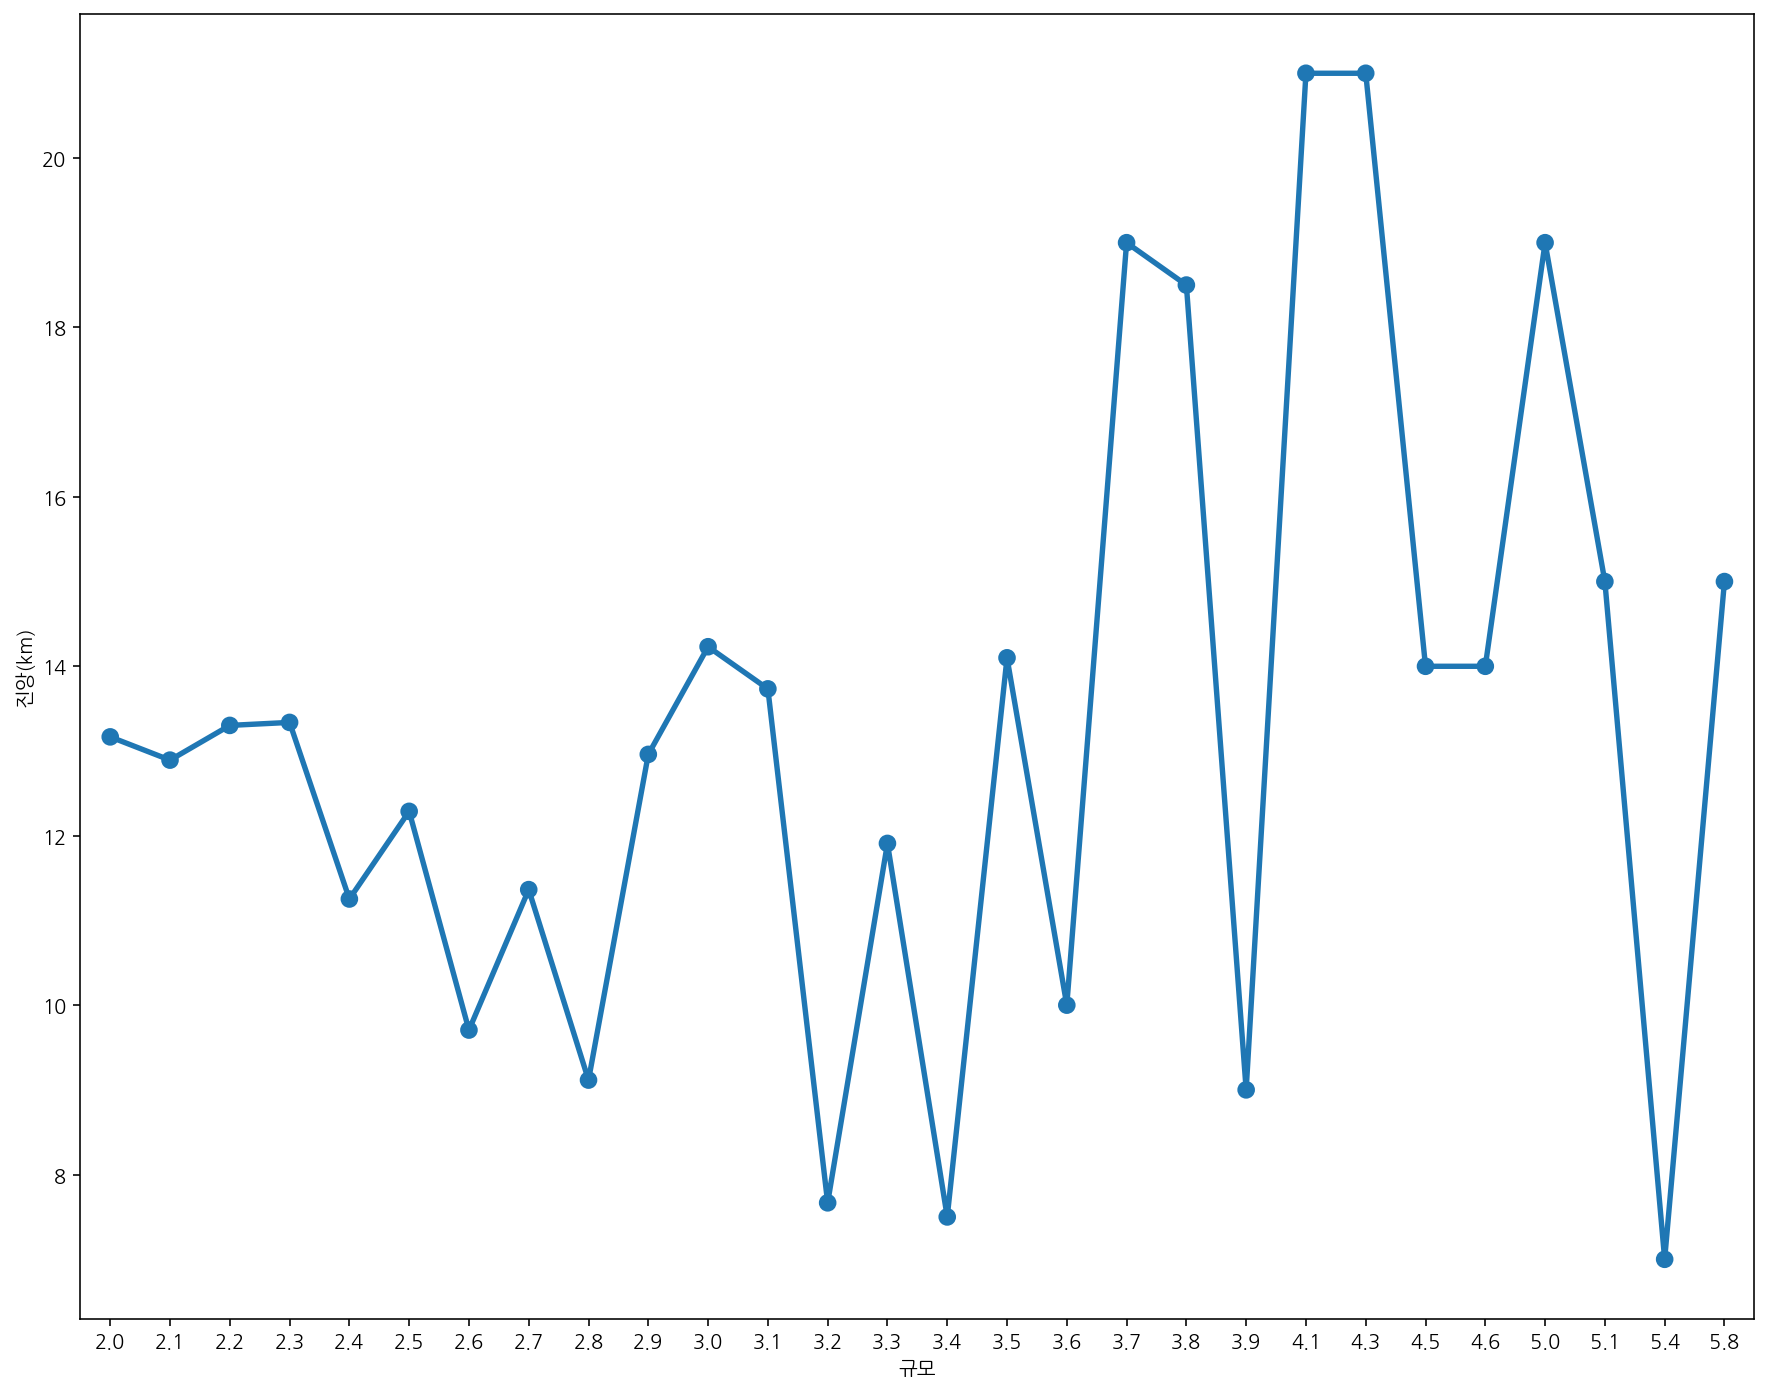

In [60]:
plt.figure(figsize=(15,12))
sns.pointplot(data = df, x = "규모", y = "진앙(km)", ci=None)

In [76]:
df['규모'].value_counts()

2.1    130
2.2     96
2.0     96
2.4     87
2.3     80
2.5     73
2.6     51
2.7     44
2.8     26
2.9     25
3.1     15
3.0     13
3.3     11
3.5     10
3.2      9
3.6      4
3.4      4
3.9      3
3.7      2
3.8      2
4.3      2
4.6      1
5.4      1
4.5      1
5.0      1
5.1      1
4.1      1
5.8      1
Name: 규모, dtype: int64

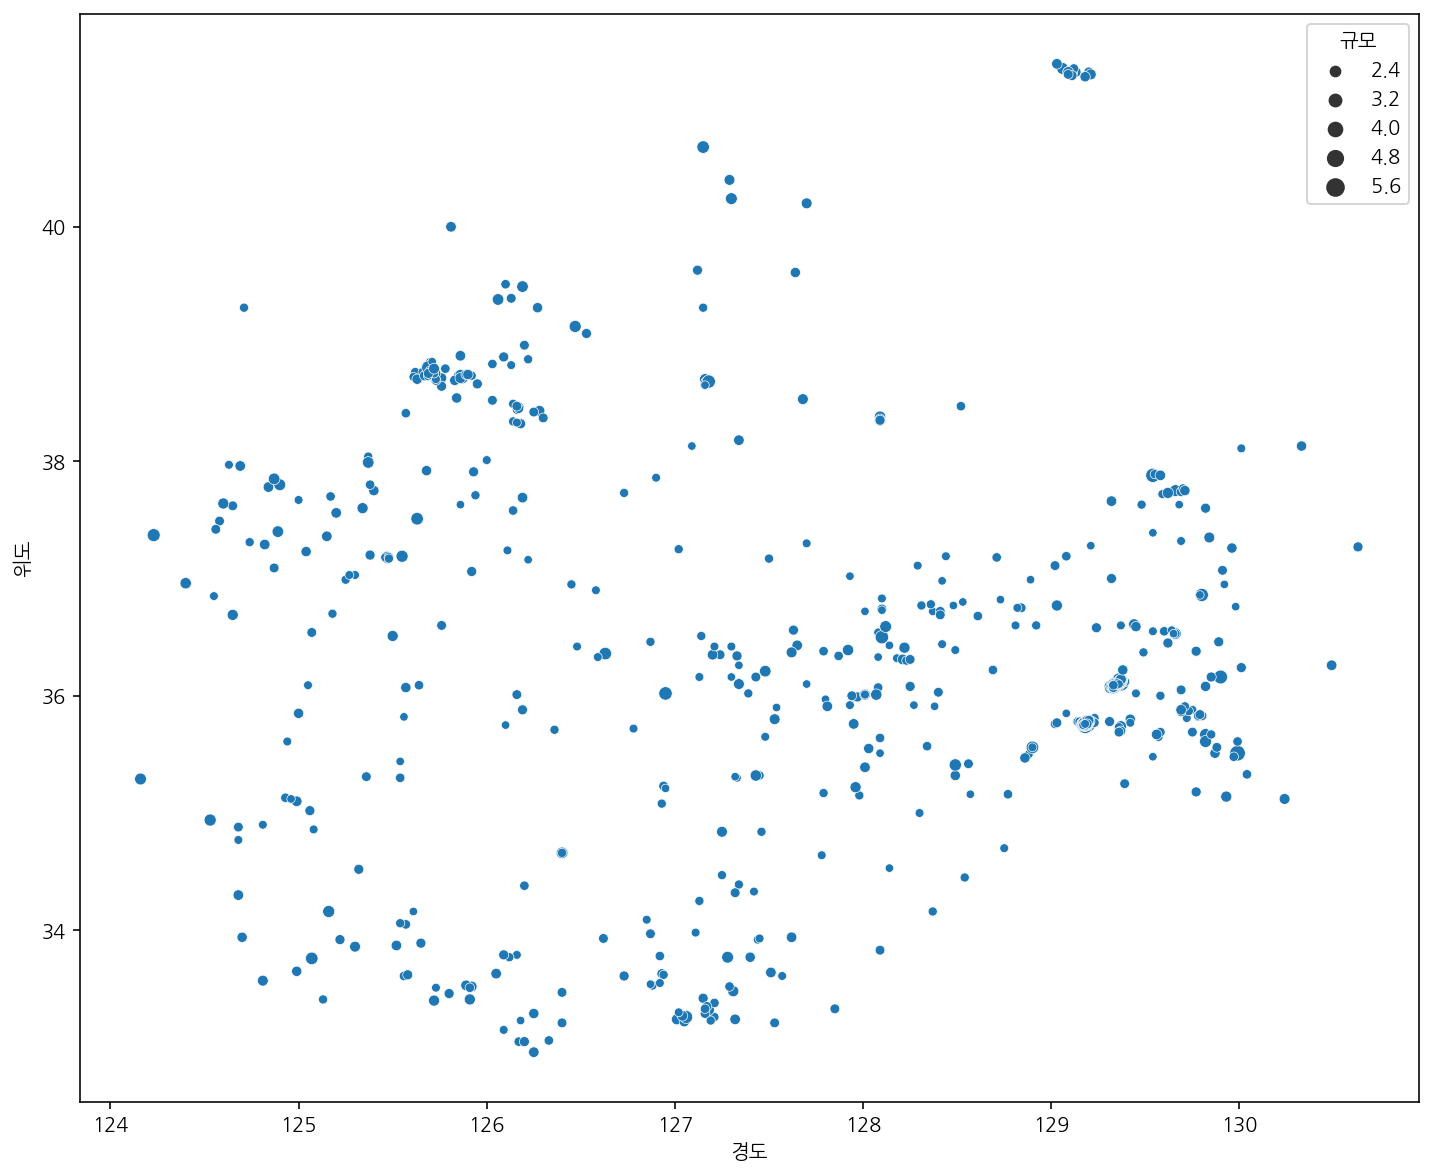

In [85]:
# 규모에 따라 다르게 크기 시각화
plt.figure(figsize = (12,10))
sns.scatterplot(data = df,x = "경도",y = "위도", size = df['규모'])

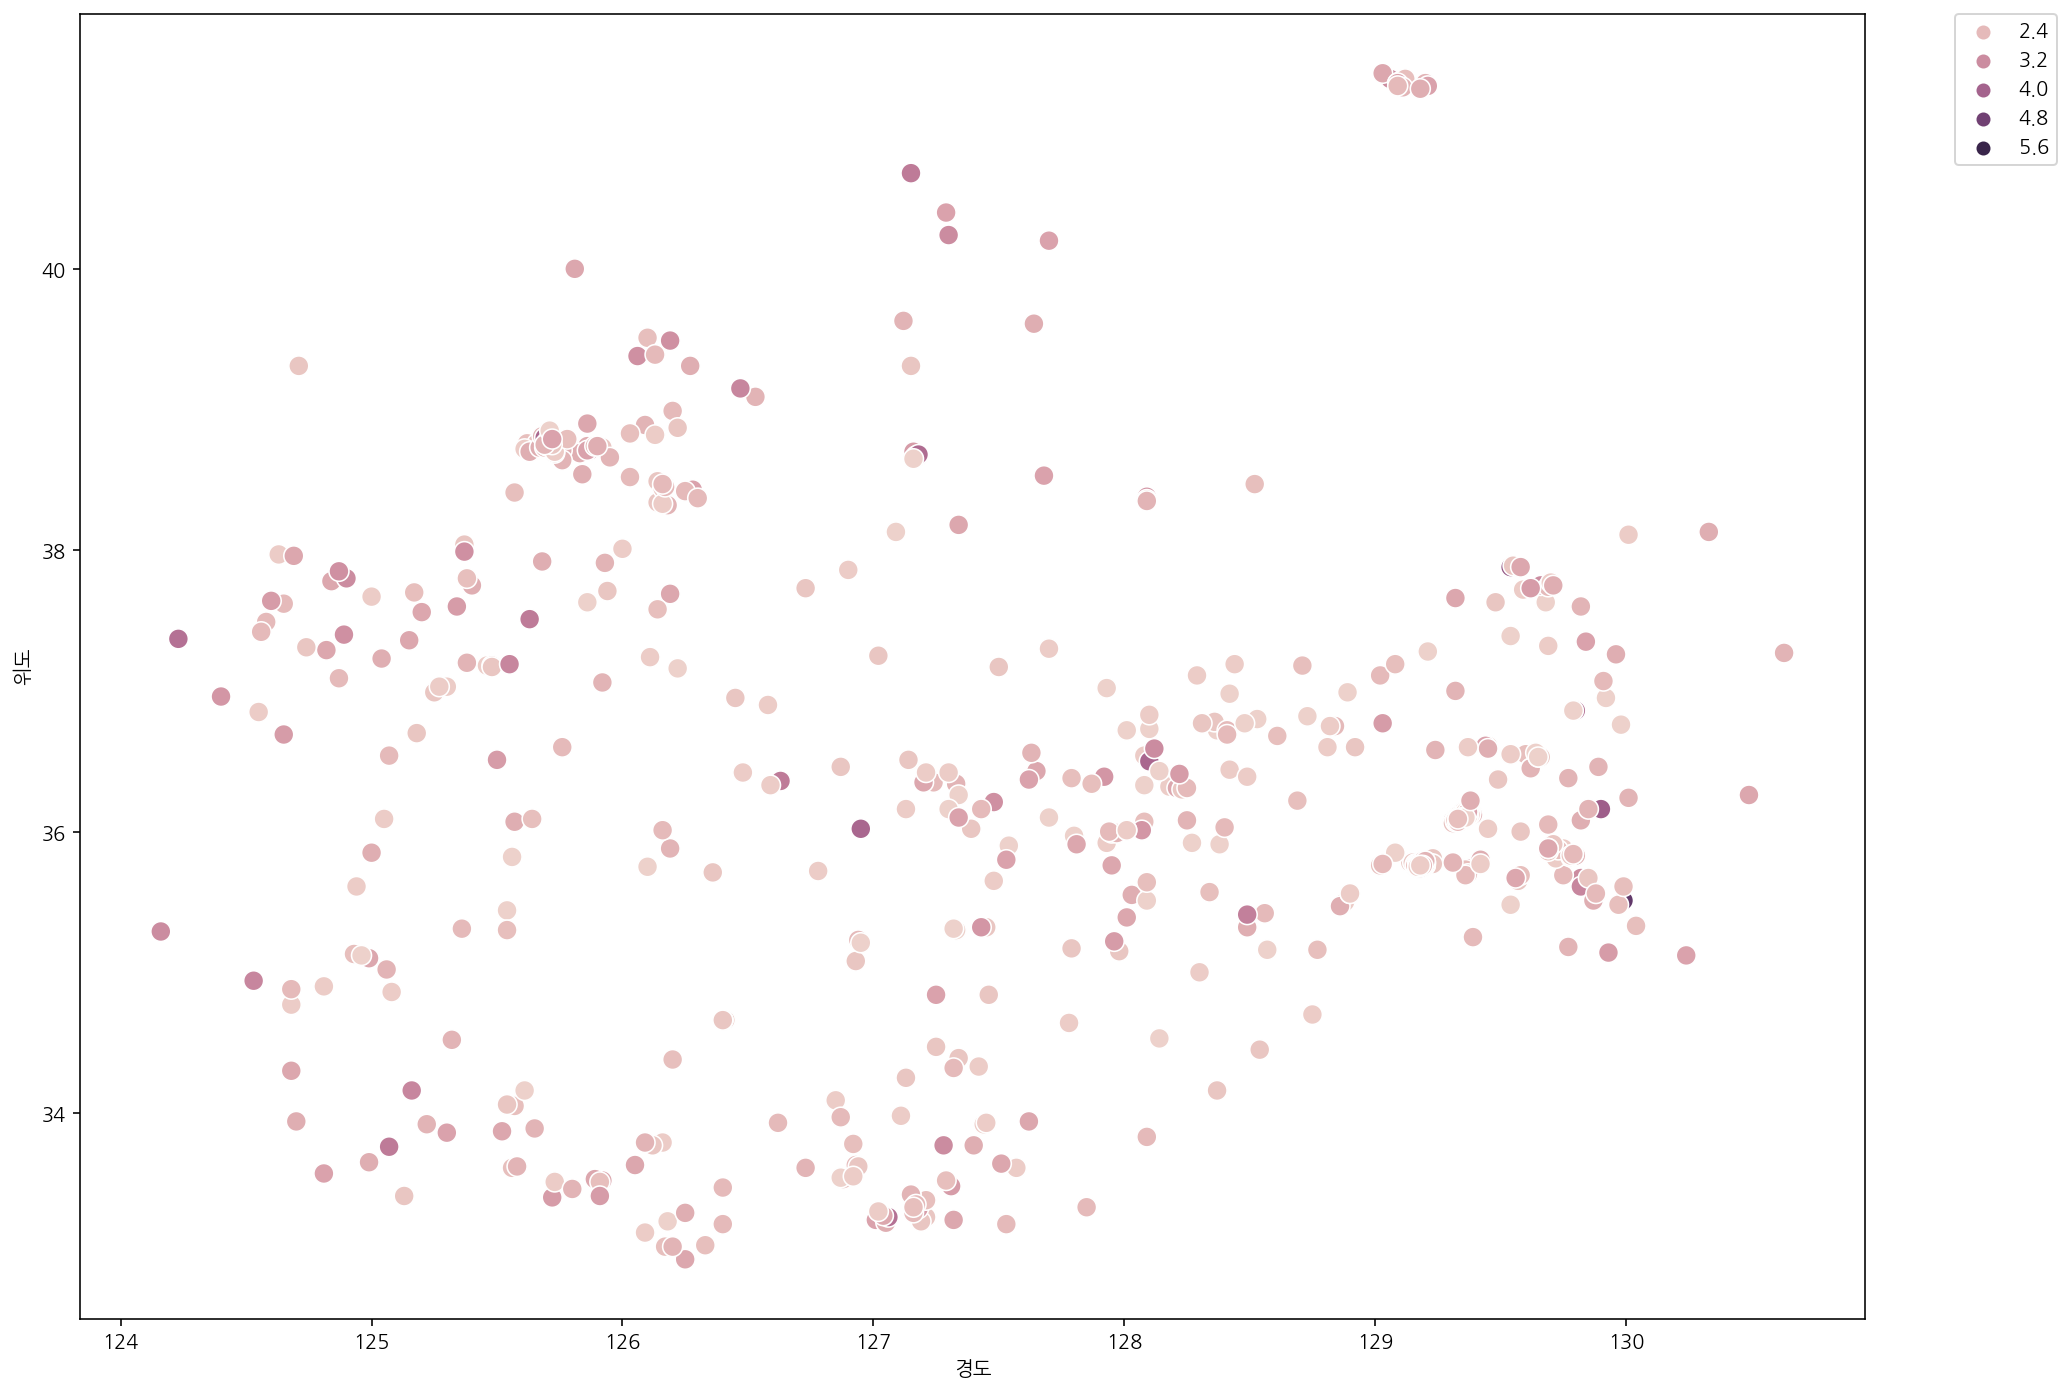

In [88]:
# seaborn의 scatterplot을 통해 구별 경도와 위도 표시
# hue 값에 따라 색상이 다르게 표현
plt.figure(figsize = (16,12))
sns.scatterplot(data = df, x = "경도", y = "위도", hue = '규모', s = 100)
plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0.)

In [54]:
# Folium 사용
# 지도 시각화를 위한 라이브러리
import folium

In [55]:
# 지도에 위치와 규모 표시
map = folium.Map(location = [df["위도"].mean(), df["경도"].mean()],
          zoom_start = 12)
for n in df.index:
    name = df.loc[n, "규모"]
    address = df.loc[n, "위치"]
    popup = f"{name}-{address}"
    location = [df.loc[n, "위도"], df.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
        ).add_to(map)
map